In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
import keras.backend as K

Using TensorFlow backend.
/home/genom/Sacred-MNIST/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/genom/Sacred-MNIST/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/genom/Sacred-MNIST/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/genom/Sacred-MNIST/env/lib/pytho

In [2]:
train_da, test_da = mnist.load_data()
x_train, y_train = train_da 
x_test, y_test = test_da

5 0 4 1
9 2 1 3
1 4 3 5
3 6 1 7


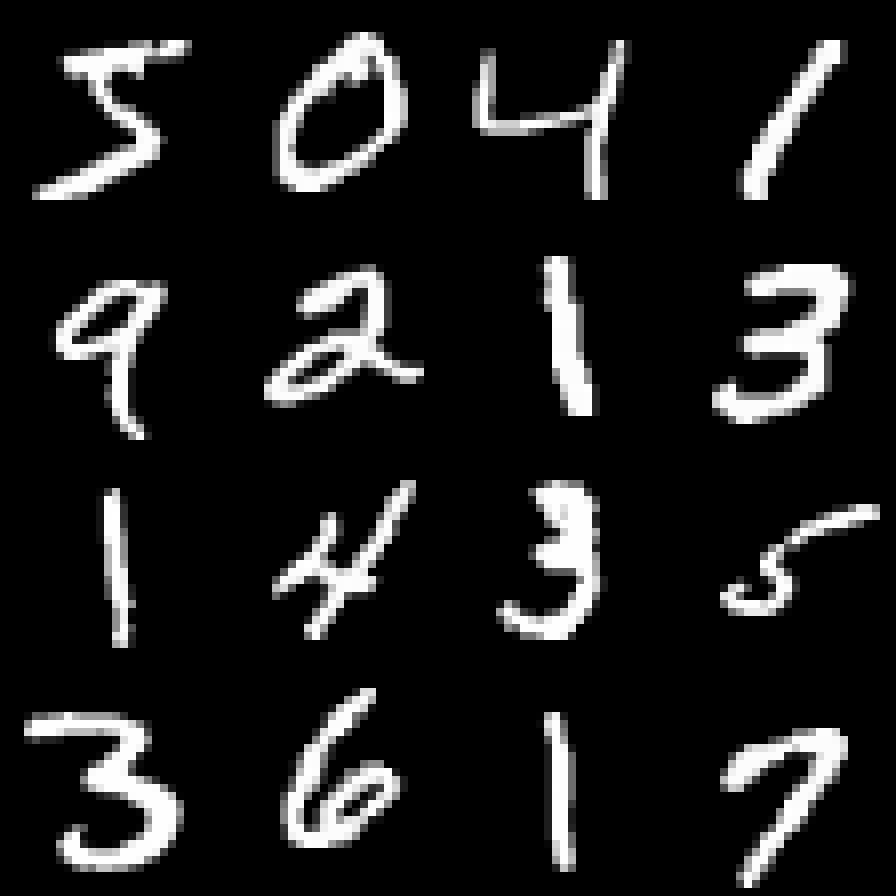

In [3]:
from IPython.display import Image
from PIL import Image
import numpy as np
import imageio


#im = imageio.imread('/home/genom/ownCloud/SofortUpload/Camera/2019/11/res1.png')
#x_train[0]=im

a = np.concatenate(x_train[0:4], axis=1)
print(" ".join([str(x) for x in y_train[0:4]]))
for i in range(3):
    a = np.concatenate([a, np.concatenate(x_train[4+i*4:8+i*4], axis=1)], axis=0)
    print(" ".join([str(x) for x in y_train[4+i*4:8+i*4]]))
img = Image.fromarray(a, 'L')
img.resize((896, 896), Image.NEAREST)

In [4]:
data_format = K.image_data_format()
rows, cols = 28, 28
num_classes = 10
train_size = x_train.shape[0]
test_size = x_test.shape[0]

if data_format == 'channels_first':
    x_train = x_train.reshape(train_size, 1, rows, cols)
    x_test = x_test.reshape(test_size, 1, rows, cols)
    input_shape = (1, rows, cols)
else:
    x_train = x_train.reshape(train_size, rows, cols, 1)
    x_test = x_test.reshape(test_size, rows, cols, 1)
    input_shape = (rows, cols, 1)
    
# norm data to float in range 0..1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to one hot vector
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
x_train = x_train[:100]
y_train = y_train[:100]

In [6]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


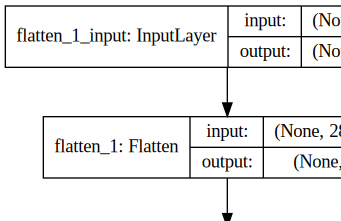

In [7]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [8]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

In [9]:
batch_size = 128
epochs = 20

In [10]:
from keras.callbacks import ModelCheckpoint, Callback

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test),
    callbacks=[ModelCheckpoint("myWeights.hdf5", monitor='val_loss', save_best_only=True, mode='auto', period=1)]
)

    
#history = model.fit(
#    x_train, y_train,
#    batch_size=batch_size,
#    epochs=epochs,
#    verbose=1,
#    validation_data=(x_test, y_test)
#)




Train on 100 samples, validate on 10000 samples
Epoch 1/20
100/100 [==============================] - 0s 2ms/step - loss: 2.4205 - accuracy: 0.0900 - val_loss: 2.3936 - val_accuracy: 0.0977
Epoch 2/20
100/100 [==============================] - 0s 795us/step - loss: 2.3442 - accuracy: 0.1300 - val_loss: 2.3459 - val_accuracy: 0.1201
Epoch 3/20
100/100 [==============================] - 0s 883us/step - loss: 2.2711 - accuracy: 0.1600 - val_loss: 2.3012 - val_accuracy: 0.1430
Epoch 4/20
100/100 [==============================] - 0s 934us/step - loss: 2.2013 - accuracy: 0.2100 - val_loss: 2.2595 - val_accuracy: 0.1733
Epoch 5/20
100/100 [==============================] - 0s 903us/step - loss: 2.1345 - accuracy: 0.2500 - val_loss: 2.2205 - val_accuracy: 0.2019
Epoch 6/20
100/100 [==============================] - 0s 852us/step - loss: 2.0707 - accuracy: 0.3100 - val_loss: 2.1840 - val_accuracy: 0.2278
Epoch 7/20
100/100 [==============================] - 0s 985us/step - loss: 2.0098 - accu

In [11]:
from matplotlib import pyplot as plt

# utility to display a row of digits with their predictions
def display_digits(digits, predictions, labels, title, n):
  plt.figure(figsize=(13,3))
  digits = np.reshape(digits, [n, 28, 28])
  digits = np.swapaxes(digits, 0, 1)
  digits = np.reshape(digits, [28, 28*n])
  plt.yticks([])
  plt.xticks([28*x+14 for x in range(n)], predictions)
  for i,t in enumerate(plt.gca().xaxis.get_ticklabels()):
    if predictions[i] != labels[i]: t.set_color('red') # bad predictions in red
  plt.imshow(digits)
  plt.grid(None)
  plt.title(title)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test1 loss:', score[0])
print('Test1 accuracy:', score[1])

im = imageio.imread('/home/genom/ownCloud/SofortUpload/Camera/2019/11/res1.png')
pix = np.empty([28, 28, 1])   
for i in range(0,28):
    for j in range(0,28):
        pix[i][j][0]=0.0 # im[i][j]/256
        
x_test[0]=pix
x_test[1]=pix
x_test[2]=pix

score = model.evaluate(x_test, y_test, verbose=1)
print('Test2 loss:', score[0])
print('Test2 accuracy:', score[1])



# recognize digits from local fonts
pixim = np.empty([1,28,28,1])   
for i in range(0,28):
    for j in range(0,28):
        pixim[0][i][j][0] = im[i][j]/256
        
N=1        
font_labels = [5]
probabilities = model.predict(pixim, steps=1)
predicted_labels = np.argmax(probabilities, axis=1)
print(predicted_labels)
display_digits(pixim, predicted_labels, font_labels, "predictions from local fonts (bad predictions in red)", N)



Test1 loss: 1.8012652862548828
Test1 accuracy: 0.4896000027656555
10000/10000 [==============================] - 0s 18us/step
Test2 loss: 1.8015368816375732
Test2 accuracy: 0.489300012588501
[3]


In [12]:
from pandas import DataFrame
df_loss = DataFrame(data={
    'Epoche': history.epoch * 2,
    'Legende': ['Loss auf Trainingsdaten'] * len(history.epoch) + ['Loss auf Testdaten'] * len(history.epoch),
    'Loss': history.history['loss'] + history.history['val_loss']
})
df_accuracy = DataFrame(data={
    'Epoche': history.epoch * 2,
    'Legende': ['Accuracy auf Trainingsdaten'] * len(history.epoch) + ['Accuracy auf Testdaten'] * len(history.epoch),
#    'Accuracy': history.history['acc'] + history.history['val_acc']
    'Accuracy': history.history['accuracy'] + history.history['val_accuracy']
})
print(df_loss)
print(df_accuracy)

    Epoche                  Legende      Loss
0        0  Loss auf Trainingsdaten  2.420514
1        1  Loss auf Trainingsdaten  2.344185
2        2  Loss auf Trainingsdaten  2.271138
3        3  Loss auf Trainingsdaten  2.201281
4        4  Loss auf Trainingsdaten  2.134521
5        5  Loss auf Trainingsdaten  2.070730
6        6  Loss auf Trainingsdaten  2.009751
7        7  Loss auf Trainingsdaten  1.951404
8        8  Loss auf Trainingsdaten  1.895500
9        9  Loss auf Trainingsdaten  1.841844
10      10  Loss auf Trainingsdaten  1.790248
11      11  Loss auf Trainingsdaten  1.740528
12      12  Loss auf Trainingsdaten  1.692518
13      13  Loss auf Trainingsdaten  1.646068
14      14  Loss auf Trainingsdaten  1.601050
15      15  Loss auf Trainingsdaten  1.557363
16      16  Loss auf Trainingsdaten  1.514928
17      17  Loss auf Trainingsdaten  1.473687
18      18  Loss auf Trainingsdaten  1.433602
19      19  Loss auf Trainingsdaten  1.394649
20       0       Loss auf Testdate

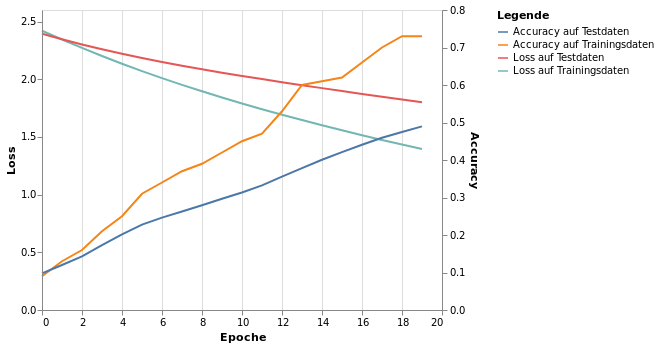

In [13]:
import altair as alt
alt.renderers.enable('notebook')

chart_loss = alt.Chart(df_loss).mark_line().encode(
    x='Epoche', y='Loss', color='Legende')
chart_accuracy = alt.Chart(df_accuracy).mark_line().encode(
    x='Epoche', y='Accuracy', color='Legende')
chart = chart_loss + chart_accuracy
chart.resolve_scale(y='independent')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                4010      
Total params: 318,010
Trainable params: 318,010
Non-trainable params: 0
_________________________________________________________________
None


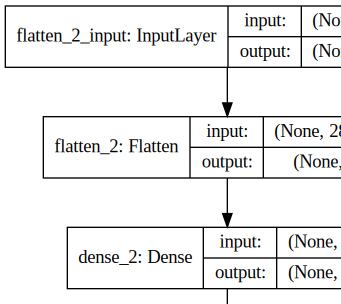

In [14]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(400, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [15]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

Train on 100 samples, validate on 10000 samples
Epoch 1/20
100/100 [==============================] - 0s 3ms/step - loss: 2.3505 - accuracy: 0.1000 - val_loss: 2.2402 - val_accuracy: 0.2502
Epoch 2/20
100/100 [==============================] - 0s 1ms/step - loss: 2.0692 - accuracy: 0.3700 - val_loss: 2.0840 - val_accuracy: 0.3761
Epoch 3/20
100/100 [==============================] - 0s 1ms/step - loss: 1.7953 - accuracy: 0.6700 - val_loss: 1.9329 - val_accuracy: 0.4390
Epoch 4/20
100/100 [==============================] - 0s 1ms/step - loss: 1.5271 - accuracy: 0.7700 - val_loss: 1.7991 - val_accuracy: 0.5017
Epoch 5/20
100/100 [==============================] - 0s 1ms/step - loss: 1.2969 - accuracy: 0.8100 - val_loss: 1.6735 - val_accuracy: 0.5611
Epoch 6/20
100/100 [==============================] - 0s 2ms/step - loss: 1.0938 - accuracy: 0.9200 - val_loss: 1.5569 - val_accuracy: 0.6069
Epoch 7/20
100/100 [==============================] - 0s 2ms/step - loss: 0.9159 - accuracy: 0.9300 

In [16]:
def evaluate(model, history):
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    df_loss = DataFrame(data={
        'Epoche': history.epoch * 2,
        'Legende': ['Loss auf Trainingsdaten'] * len(history.epoch) + ['Loss auf Testdaten'] * len(history.epoch),
        'Loss': history.history['loss'] + history.history['val_loss']
    })
    df_accuracy = DataFrame(data={
        'Epoche': history.epoch * 2,
        'Legende': ['Accuracy auf Trainingsdaten'] * len(history.epoch) + ['Accuracy auf Testdaten'] * len(history.epoch),
 #    'Accuracy': history.history['acc'] + history.history['val_acc']
    'Accuracy': history.history['accuracy'] + history.history['val_accuracy']
   })
    chart_loss = alt.Chart(df_loss).mark_line().encode(
        x='Epoche', y='Loss', color='Legende')
    chart_accuracy = alt.Chart(df_accuracy).mark_line().encode(
        x='Epoche', y='Accuracy', color='Legende')
    chart = chart_loss + chart_accuracy
    return chart.resolve_scale(y='independent')

Test loss: 1.0936033281326294
Test accuracy: 0.6802999973297119


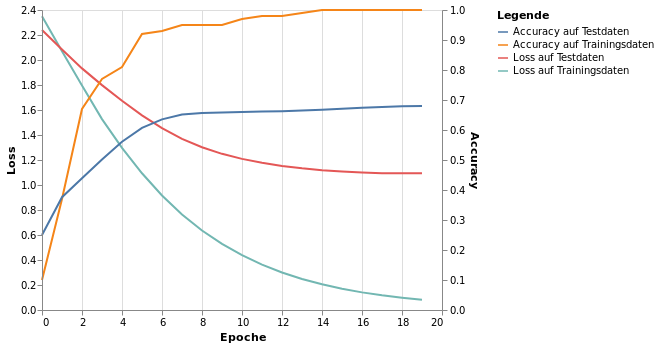

In [17]:
evaluate(model, history)

In [18]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

train_size = x_train.shape[0]
test_size = x_test.shape[0]

data_format = K.image_data_format()
if data_format == 'channels_first':
    x_train = x_train.reshape(train_size, 1, rows, cols)
    x_test = x_test.reshape(test_size, 1, rows, cols)
    input_shape = (1, rows, cols)
else:
    x_train = x_train.reshape(train_size, rows, cols, 1)
    x_test = x_test.reshape(test_size, rows, cols, 1)
    input_shape = (rows, cols, 1)
    
# norm data to float in range 0..1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to one hot vector
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 400)               314000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                4010      
Total params: 318,010
Trainable params: 318,010
Non-trainable params: 0
_________________________________________________________________
None


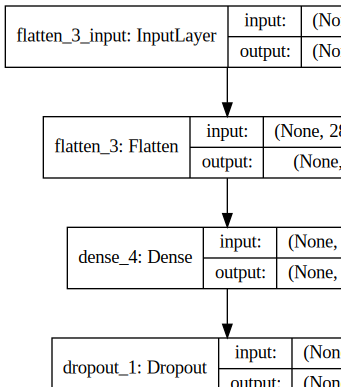

In [19]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(400, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [20]:
batch_size = 128
epochs = 12

model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 3s 55us/step - loss: 0.3616 - accuracy: 0.8935 - val_loss: 0.1574 - val_accuracy: 0.9538
Epoch 2/12
60000/60000 [==============================] - 3s 52us/step - loss: 0.1708 - accuracy: 0.9499 - val_loss: 0.1094 - val_accuracy: 0.9679
Epoch 3/12
60000/60000 [==============================] - 4s 71us/step - loss: 0.1308 - accuracy: 0.9608 - val_loss: 0.0930 - val_accuracy: 0.9727
Epoch 4/12
60000/60000 [==============================] - 3s 58us/step - loss: 0.1067 - accuracy: 0.9676 - val_loss: 0.0800 - val_accuracy: 0.9756
Epoch 5/12
60000/60000 [==============================] - 4s 62us/step - loss: 0.0923 - accuracy: 0.9718 - val_loss: 0.0749 - val_accuracy: 0.9765
Epoch 6/12
60000/60000 [==============================] - 3s 54us/step - loss: 0.0812 - accuracy: 0.9745 - val_loss: 0.0676 - val_accuracy: 0.9798
Epoch 7/12
60000/60000 [==============================] - 3s 56us/st

Test loss: 0.054808760992554016
Test accuracy: 0.9832000136375427


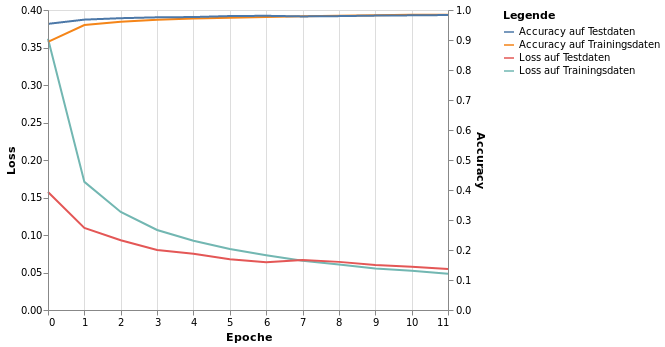

In [21]:
evaluate(model, history)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 200)               1843400   
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)             

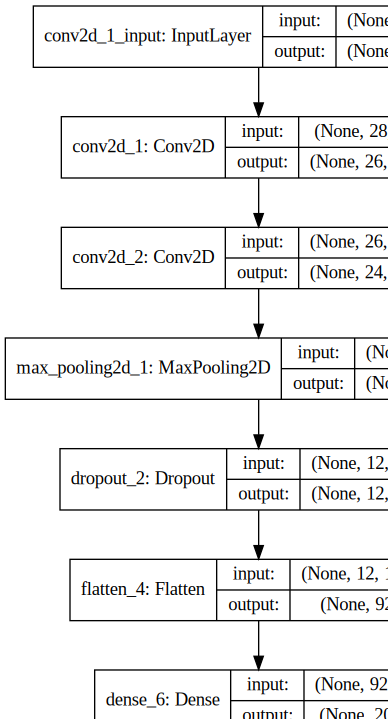

In [22]:
model = Sequential()
model.add(Conv2D(
             32, kernel_size=(3, 3), 
             activation='relu', 
             input_shape=input_shape))
model.add(Conv2D(
             64, kernel_size=(3, 3), 
             activation='relu'))
model.add(MaxPooling2D(
             pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

![Struktur des Convolutional Network](Convnet.svg)

In [23]:
batch_size = 128
epochs = 12

model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 67s 1ms/step - loss: 0.2078 - accuracy: 0.9365 - val_loss: 0.0485 - val_accuracy: 0.9849
Epoch 2/12
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0714 - accuracy: 0.9779 - val_loss: 0.0328 - val_accuracy: 0.9890
Epoch 3/12
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0537 - accuracy: 0.9839 - val_loss: 0.0300 - val_accuracy: 0.9906
Epoch 4/12
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0437 - accuracy: 0.9867 - val_loss: 0.0272 - val_accuracy: 0.9910
Epoch 5/12
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0353 - accuracy: 0.9892 - val_loss: 0.0298 - val_accuracy: 0.9899
Epoch 6/12
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0316 - accuracy: 0.9902 - val_loss: 0.0282 - val_accuracy: 0.9911
Epoch 7/12
60000/60000 [==============================] - 66s 1ms/st

Test loss: 0.031392842231864254
Test accuracy: 0.9911999702453613
[5]


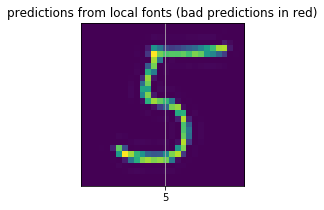

In [24]:
evaluate(model, history)

N=1        
font_labels = [5]
probabilities = model.predict(pixim, steps=1)
predicted_labels = np.argmax(probabilities, axis=1)
print(predicted_labels)
display_digits(pixim, predicted_labels, font_labels, "predictions from local fonts (bad predictions in red)", N)


Schöne 3D-Visualisierung eines Convolutional Networks für MNIST: http://scs.ryerson.ca/~aharley/vis/conv/